<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/ML_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Ερωτήματα**

## *Ερώτημα 1*

In [63]:
df = pd.read_csv('water_potability.csv')
print(df)
print(df.describe())


            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

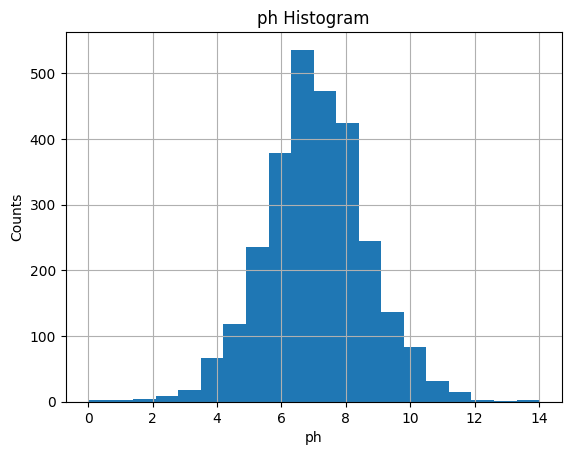

In [64]:
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')
plt.show()

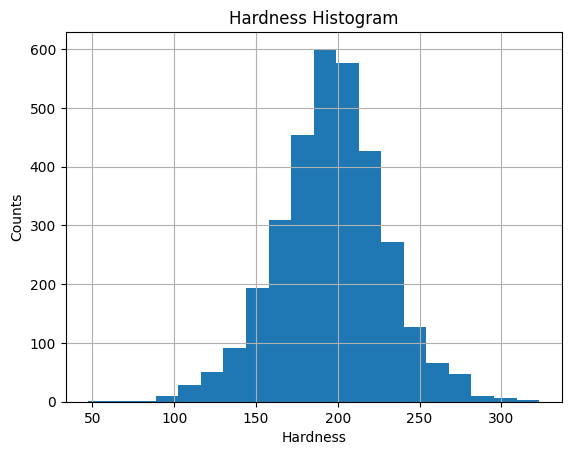

In [65]:
df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')
plt.show()

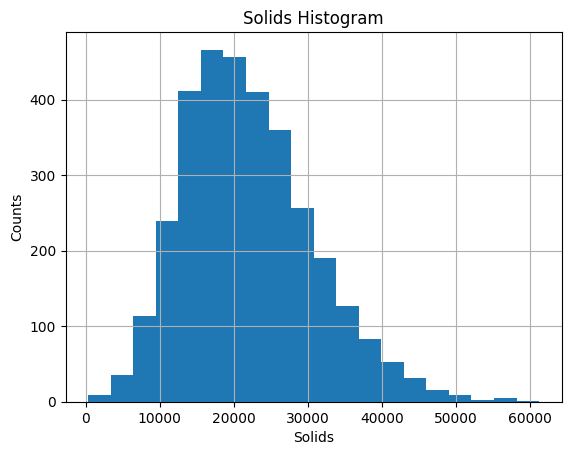

In [66]:
df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')
plt.show()

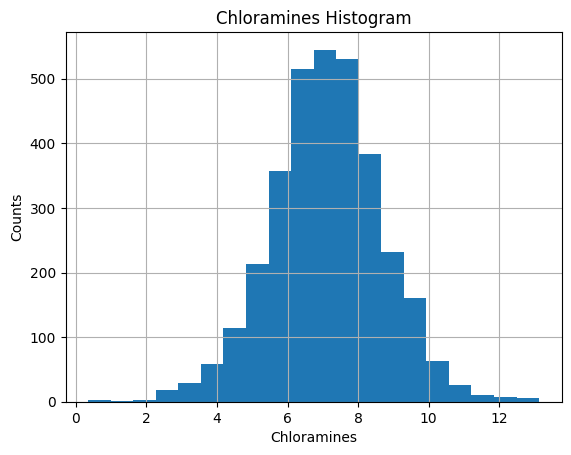

In [67]:
df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')
plt.show()

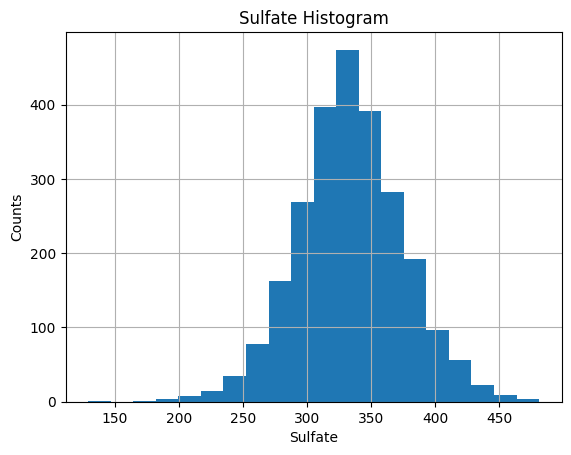

In [68]:
df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')
plt.show()

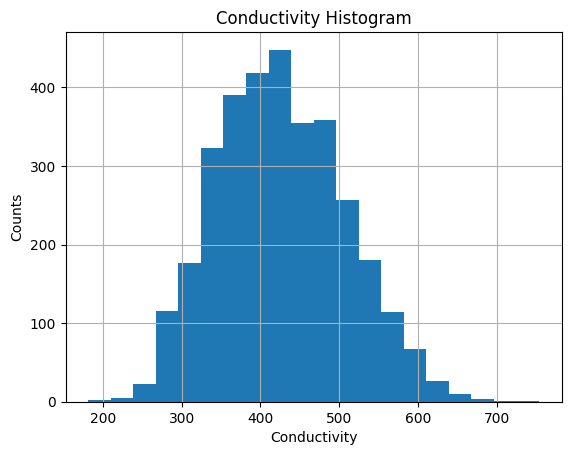

In [69]:
df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')
plt.show()

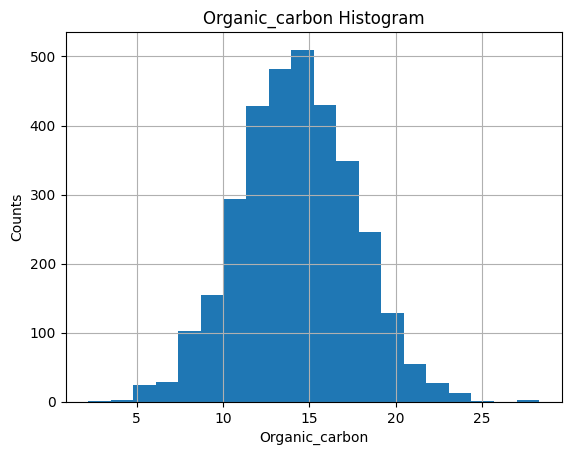

In [70]:
df['Organic_carbon'].hist(bins=20)
plt.title('Organic_carbon Histogram')
plt.xlabel('Organic_carbon')
plt.ylabel('Counts')
plt.show()

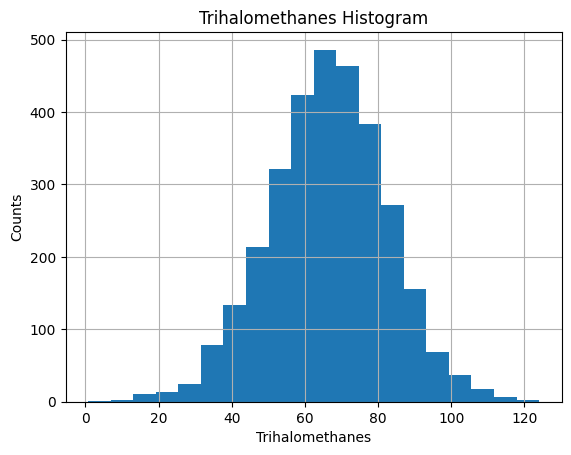

In [71]:
df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')
plt.show()

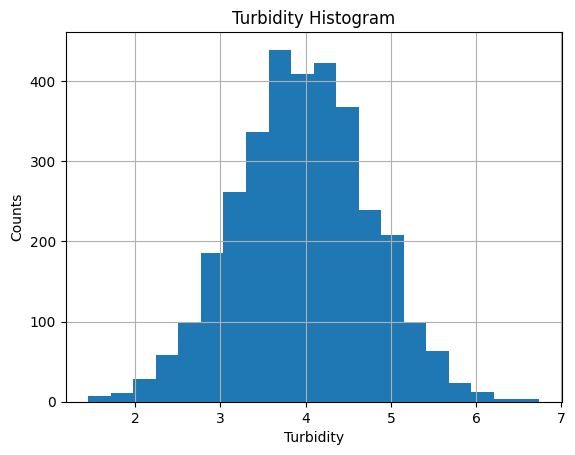

In [72]:
df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')
plt.show()

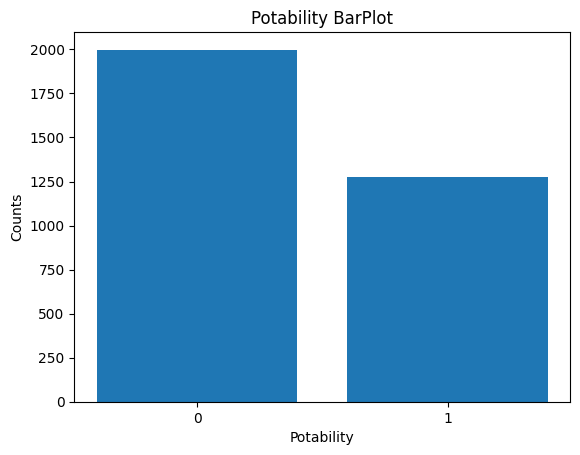

In [73]:
potability_counts = df['Potability'].value_counts()
plt.bar(potability_counts.index, potability_counts.values)
plt.title('Potability BarPlot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.xticks(potability_counts.index)
plt.show()

In [74]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [75]:
counts = df['Potability'].value_counts()
percentages = df['Potability'].value_counts(normalize=True) * 100
print("\nΚατανομή Potability:")
print(pd.DataFrame({'Πλήθος': counts, 'Ποσοστό %': percentages}))


Κατανομή Potability:
            Πλήθος  Ποσοστό %
Potability                   
0             1998  60.989011
1             1278  39.010989


Θεωρώ πως η ποιότητα των δεδομένων δεν είναι ικανοποιητική καθώς υπάρχουν πολλές ελλιπείς τιμές στα χαρακτηριστικά ph, Sulfate και Trihalomethanes.

## *Ερώτημα 2*

In [76]:
conditions = [
    df['ph'] < 6.5,
    (df['ph'] >= 6.5) & (df['ph'] <= 8.5),
    df['ph'] > 8.5
]
categories = ['<6.5', '6.5–8.5', '>8.5']

df1 = df.copy()
df1['ph_range'] = pd.cut(df['ph'], bins=[0,6.5,8.5,14], labels=categories, include_lowest=True)

ph_pivot = df1.pivot_table(values='Potability', index='ph_range', aggfunc=['count','mean'])
ph_pivot.columns = ['Πλήθος', 'Ποσοστό Πόσιμου Νερού']
ph_pivot['Ποσοστό Μη Πόσιμου Νερού'] = 1 - ph_pivot['Ποσοστό Πόσιμου Νερού']
ph_pivot['Ποσοστό Πόσιμου Νερού'] *= 100
ph_pivot['Ποσοστό Μη Πόσιμου Νερού'] *= 100

print(ph_pivot)

          Πλήθος  Ποσοστό Πόσιμου Νερού  Ποσοστό Μη Πόσιμου Νερού
ph_range                                                         
<6.5         968              36.776860                 63.223140
6.5–8.5     1328              43.900602                 56.099398
>8.5         489              33.128834                 66.871166


/tmp/ipython-input-1234188467.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ph_pivot = df1.pivot_table(values='Potability', index='ph_range', aggfunc=['count','mean'])
/tmp/ipython-input-1234188467.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ph_pivot = df1.pivot_table(values='Potability', index='ph_range', aggfunc=['count','mean'])


Πράγματι, το ποσοστό πόσιμου νερού στην κατηγορία 6.5-8.5 είναι υψηλότερο, αλλά όχι με μεγάλη διαφορά.

## *Ερώτημα 3*

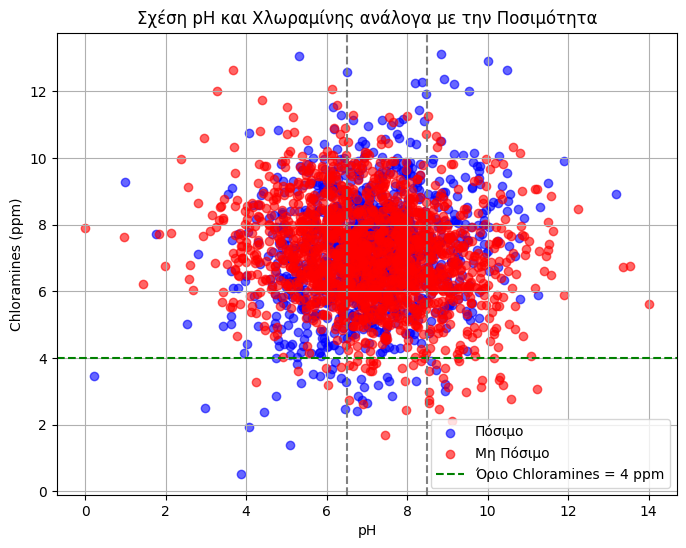

In [77]:
df_clean = df.dropna(subset=['ph', 'Chloramines'])
plt.figure(figsize=(8,6))
plt.scatter(
    df_clean[df_clean['Potability']==1]['ph'],
    df_clean[df_clean['Potability']==1]['Chloramines'],
    color='blue', label='Πόσιμο', alpha=0.6
)
plt.scatter(
    df_clean[df_clean['Potability']==0]['ph'],
    df_clean[df_clean['Potability']==0]['Chloramines'],
    color='red', label='Μη Πόσιμο', alpha=0.6
)
plt.axhline(4, color='green', linestyle='--', label='Όριο Chloramines = 4 ppm')
plt.axvline(6.5, color='gray', linestyle='--')
plt.axvline(8.5, color='gray', linestyle='--')
plt.xlabel('pH')
plt.ylabel('Chloramines (ppm)')
plt.title('Σχέση pH και Χλωραμίνης ανάλογα με την Ποσιμότητα')
plt.legend()
plt.grid(True)
plt.show()

Από το διάγραμμα γίνεται αντιληπτό ότι στα προτεινόμενα επίπεδα χλωραμίνης υπερισχύουν οι περιπτώσεις όπου το νερό είναι πόσιμο. Αντίστοιχα οι περισσότερες περιπτώσεις όπου είναι μη πόσιμο, εμφανίζονται πάνω από τα προτεινόμενα επίπεδα.

## *Ερώτημα 4*

In [78]:
df = df.fillna(df.mean(numeric_only=True))

## *Ερώτημα 5*

In [79]:
x = df.drop(columns=['Potability']).values
y = df['Potability'].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0
)

print("Train set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Train set shape: (2293, 9) (2293,)
Test set shape: (983, 9) (983,)


## *Ερώτημα 6*

In [80]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Ακρίβεια στο train set: ")
print(train_accuracy)
print("Ακρίβεια στο test set: ")
print(test_accuracy)

Ακρίβεια στο train set: 
1.0
Ακρίβεια στο test set: 
0.5747711088504578


## *Ερώτημα 7*

In [81]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]
results = []
for criterion, max_depth, min_split, min_leaf, max_feat, ccp_alpha in product(
    criteria, max_depths, min_splits, min_leaves, max_features_list, ccp_alphas
):
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=ccp_alpha,
        random_state=0
    )
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_feat,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)
print(results_df.head(10))

  criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0   entropy        5.0                  5                 2         None   
1   entropy        5.0                  2                 2         None   
2   entropy        5.0                  2                 1         None   
3   entropy        5.0                  5                 1         None   
4      gini        5.0                  2                 2         None   
5      gini        5.0                  5                 2         None   
6      gini        5.0                  2                 1         None   
7      gini        5.0                  5                 1         None   
8   entropy        3.0                  2                 1         None   
9   entropy        3.0                  2                 2         None   

   ccp_alpha  train_acc  test_acc  
0        0.0   0.671173  0.655137  
1        0.0   0.671173  0.655137  
2        0.0   0.671609  0.654120  
3        0.0   0.67

## *Ερώτημα 8*

In [82]:
best_row = results_df[results_df['max_depth'] == 3].sort_values('test_acc', ascending=False).iloc[0]
best_row


,8
criterion,entropy
max_depth,3.0
min_samples_split,2
min_samples_leaf,1
max_features,None
ccp_alpha,0.0
train_acc,0.641082
test_acc,0.639878


In [83]:
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    ccp_alpha=0.0,
    random_state=0
)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       random_state=0)

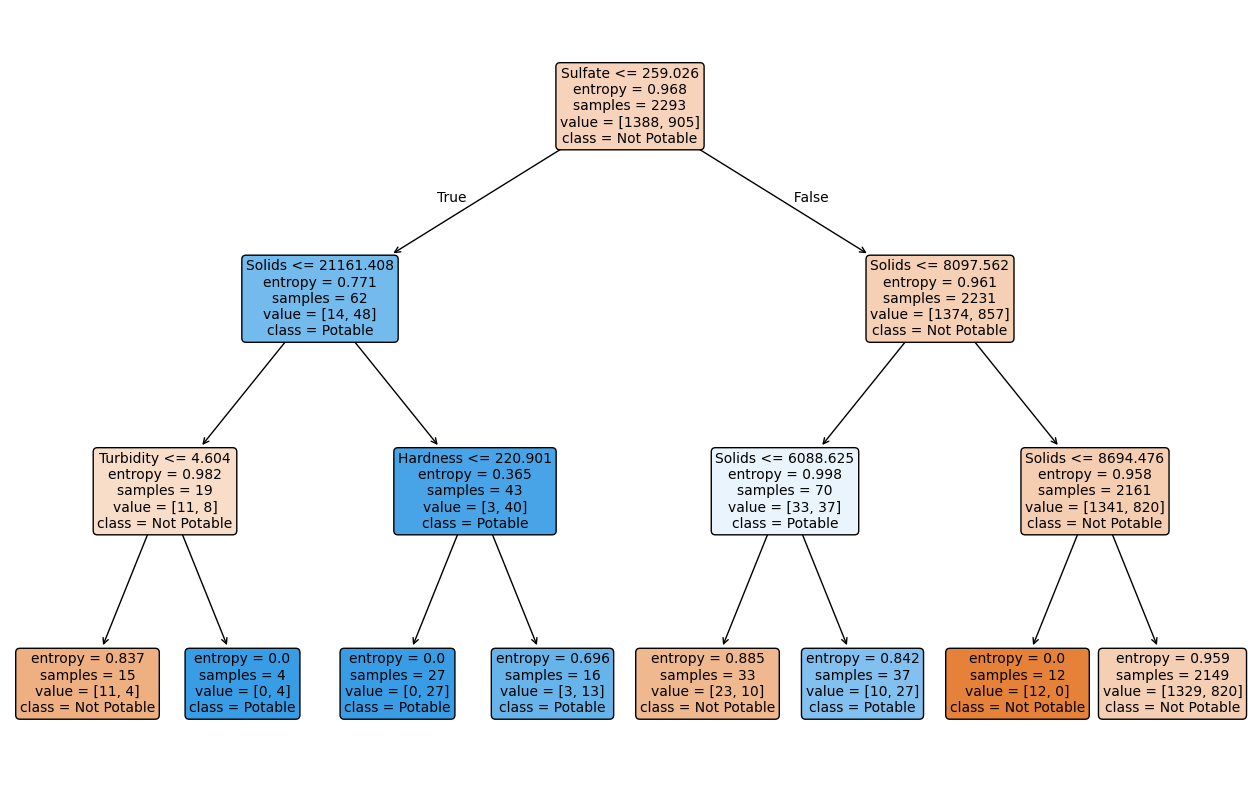

In [85]:
plt.figure(figsize=(16, 10))
feature_names = [
    'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'
]
plot_tree(best_model,
          feature_names=feature_names,
          class_names=['Not Potable', 'Potable'],
          filled=True, rounded=True, fontsize=10)
plt.show()

Από το δέντρο εξάγονται οι παρακάτω κανόνες:
*   Για Sulfate <= 259.026
1.   Αν Solid <= 21161.408 και Turbidity <= 4.604 τότε το νερό είναι Not Potable
2.   Αν Solid <= 21161.408 και Turbidity > 4.604 τότε το νερό είναι Potable
3.   Αν Solid > 21161.408 και Hardness <= 220.901 τότε το νερό είναι Potable
4.   Αν Solid > 21161.408 και Hardness > 220.901 τότε το νερό είναι Potable
*   Για Sulfate > 259.026
1.   Αν Solid <= 8097.562 και Solid <= 6088.625 τότε το νερό είναι Not Potable
2.   Αν Solid <= 8097.562 και Solid > 6088.625 τότε το νερό είναι Potable
3.   Αν Solid > 8097.562 και Solid <= 8694.476 τότε το νερό είναι Not Potable
4.   Αν Solid <= 8097.562 και Solid > 8694.476 τότε το νερό είναι Not Potable



## *Ερώτημα 9*

In [86]:
best_row = results_df.sort_values('test_acc', ascending=False).iloc[0]
best_row

,0
criterion,entropy
max_depth,5.0
min_samples_split,5
min_samples_leaf,2
max_features,None
ccp_alpha,0.0
train_acc,0.671173
test_acc,0.655137


In [87]:
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    ccp_alpha=0.0,
    random_state=0
)
best_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

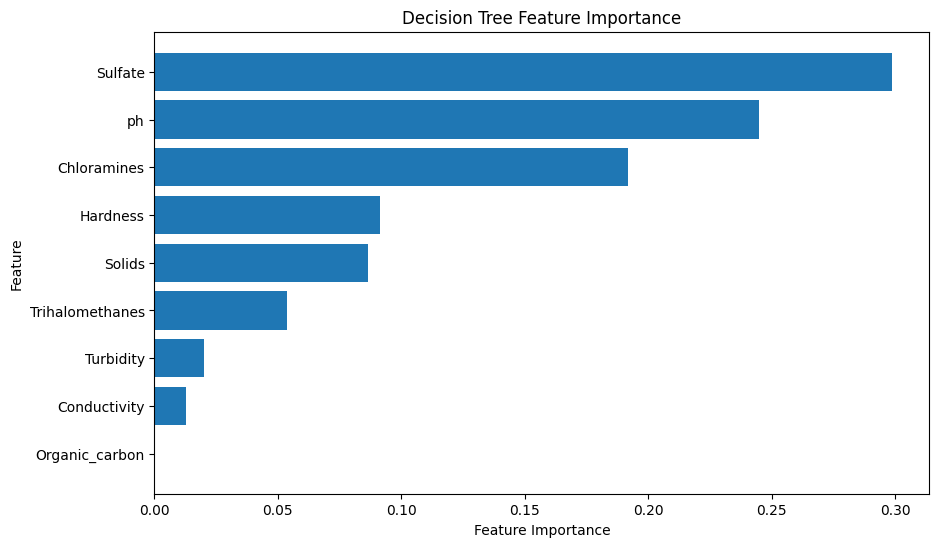

In [89]:
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis() # To have the most important feature at the top
plt.show()

Στην περίπτωση όπου η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις, θα έπρεπε να εξάγει από το νερό τα χαρακτηριστικά Sulfate, ph, Chloramines, Hardness και Solids, καθώς σύμφωνα με το παραπάνω διάγραμμα είναι εκείνα με τη μεγαλύτερη σημαντικότητα.

## *Ερώτημα 10*

Είναι ακριβώς το ίδιο με το *Ερώτημα 9*

## *Ερώτημα 11*

Ένα Τυχαίο Δάσος (Random Forest) ενδεχομένως πετυχαίνει καλύτερη ακρίβεια από ένα Δέντρο Απόφασης διότι μειώνονται οι πιθανότητες να υπάρξει overfitting σε σχέση με το Δέντρο, καθώς το τελικό αποτέλεσμα προκύπτει από μέσο όρο. Επιπλέον, κάθε Δάσος εκπαιδεύεται σε τυχαίο δείγμα χαρακτηριστικών, ενώ παράλληλα τα τελικά αποτελέσματα προκύπτουν από τον συνδυασμό των αποτελεσμάτων όλων των Δέντρων. Τέλος, το Τυχαίο Δάσος παρουσιάσει μικρότερη ευαισθησία σε θόρυβο και outliers.

## *Ερώτημα 12*

In [91]:
n_estimators = [50, 100, 200]
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leaves = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]
results = []
for n_estimators, criterion, max_depth, min_split, min_leaf, max_feat, ccp_alpha in product(n_estimators,
    criteria, max_depths, min_splits, min_leaves, max_features_list, ccp_alphas
):
    model = RandomForestClassifier(n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=ccp_alpha,
        random_state=0
    )
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    results.append({
        'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_feat,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
    })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)
print(results_df.head(10))

   n_estimators criterion  max_depth  min_samples_split  min_samples_leaf  \
0           100      gini        NaN                  2                 1   
1           200   entropy        NaN                  5                 2   
2            50      gini        NaN                  2                 1   
3           200   entropy        NaN                  2                 1   
4           200      gini        NaN                  2                 1   
5           100   entropy        NaN                  2                 2   
6           200   entropy        NaN                  2                 2   
7           100   entropy        NaN                  2                 1   
8            50   entropy        NaN                  2                 2   
9           200      gini        NaN                  5                 1   

  max_features  ccp_alpha  train_acc  test_acc  
0         sqrt        0.0   1.000000  0.697864  
1         sqrt        0.0   0.999564  0.693795  
2    

## *Ερώτημα 13*

Πιο σημαντικό για το μοντέλο είναι να προβλέπει καλύτερα το μη πόσιμο νερό, χάνοντας ακρίβεια από το πόσιμο νερό. Με τον τρόπο αυτό μειώνονται οι πιθανότητες κάποιος να πιει νερό το οποίο δεν είναι πόσιμο.

## *Ερώτημα 14*

Θεωρώ πως νομικά ασφαλέστερο για την εταιρεία είναι η χρήση του καλύτερου δέντρου, καθώς είναι ένα μοντέλο που εξηγεί τους λόγους πίσω από τις αποφάσεις που παίρνει.